# Mini-Project

Self-drivinng cars software contains (as far as I am aware) 4 components: 
1. Edge Detection and recognize where it is w.r.t edges
2. NN to detect cars/other vehicles and/or target
3. Sensors data to determine it's acceleration, position
4. Logic to tell the car to turn left/right fast/slow

This is a complete deliverable for detecting edges with little to no prior knowledge how edge detection is done

Resources: 
- https://towardsdatascience.com/line-detection-make-an-autonomous-car-see-road-lines-e3ed984952c
- https://www.youtube.com/watch?v=O5xeyoRL95U&list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf
- https://www.udacity.com/school-of-autonomous-systems


## Step 0: An endpoint
This step loads an endpoint, where the image will be read and processed

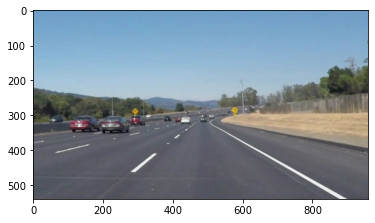

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# imgpath = "C:\\Users\\USER\\Desktop\\Self-driving test\driving_view.jpg"
imgpath = "C:\\Users\\USER\\Desktop\\Self-driving test\solidWhiteCurve.jpg"
img = mpimg.imread(imgpath)
plt.imshow(img)
plt.show()

## Step 1: Convert to grayscale

This is used to simplify an image. Grayscale usually retains enough information to for object detection, while reducing complexity of problem set.

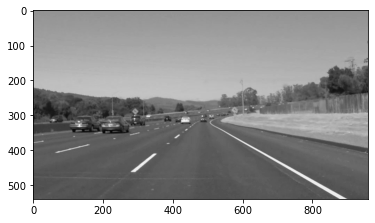

In [2]:
import cv2

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

## Step 2: Applying Gaussian Blur

Link to knowledge: https://en.wikipedia.org/wiki/Gaussian_blur

The idea with applyinh a blur is to smoothen out edges, it is essentially a low pass filter, where high frequency edges are smoothen to non-existent. The higher the kernel value, the more aggressive the blur.

Imagine a tree, do you need to know where all individual leaves are as compared to knowing where the outline is?

Imagine a road, do you need to know where every single stone on the ground is, even when we can drive over it?

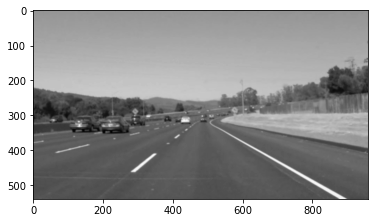

In [3]:
kernel_size = 5
gauss_img = cv2.GaussianBlur(gray_img,(kernel_size, kernel_size), 0)
plt.imshow(gauss_img, cmap="gray")
plt.show()

## Step 3: Canny Edge Detection

Knowledge: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

Definition of Hysterisis: 
```
the phenomenon in which the value of a physical property lags behind changes in the effect causing it, as for instance when magnetic induction lags behind the magnetizing force.
```

Essentially, there are 4 stages to Canny Detection:
1. Preprocessing (Bluring)
2. Find Intensity Gradient (G_x, G_y) of image using Sorbel Kernel
3. Non-maximum Suppression (suppresses edge that does not form a local maximum)
4. Hysterisis threshold (Take values beyond max value as it is the actual edge)

`opencv` has abstracted the above steps for us.

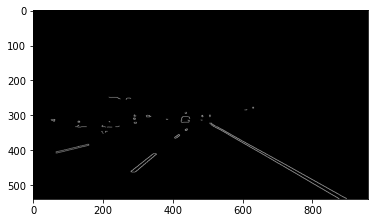

In [4]:
low_threshold, high_threshold = [200, 300]
canny_img = cv2.Canny(gauss_img, low_threshold, high_threshold)
plt.imshow(canny_img, cmap="gray")
plt.show()

## Step 4: Viewport

Resorce on image manipulation: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html

When we drive, our actions for where to move are dependent on what is in front of us. We (usually/hopefully) do not look into a sky and decide to turn left, or look at a squirrel on a tree and decide to do a U-turn. Therefore, we can draw a viewport and take actions based on edges in the viewport.

The natural thing to do is to draw a trapezium/triangle onto the image.

In [5]:
import numpy as np

line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# Setting the corners of the trapezium
vertices = np.array([[(0, line_img.shape[0]), (line_img.shape[1], line_img.shape[0]), (400, 260), (600, 260)]])

# make a blank/white image
mask = np.zeros_like(img)
mask_channels = (255,) * img.shape[2]

# Fill the area of interest with 0 and 255 these
# which lie outside of it, thoughout all color channels
cv2.fillPoly(mask, vertices, mask_channels)

# Keep only the pixels with 0 value of the canny_img
masked_img = cv2.bitwise_and(img, mask)

## Step 5: Hough's Line Detector

Resource: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

Though unable to visualize, believe that there is a trapezium drawn (need to learn how to visualize this). 

From the steps above, we now have a region of edges, represented as dots. Now we want to trace the dots into lines. 

In [6]:
## TODO: Fix!

import math

lines = cv2.HoughLinesP(canny_img, rho=1, theta=math.pi/180,
                        threshold=15, lines=np.array([]),        
                        minLineLength=30,
                        maxLineGap=40)


## Step 6: Draw the line

Resource: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html

General idea is: split image into 2 halves, then draw a line based on the two halves.

In [7]:
from sklearn.linear_model import HuberRegressor
## TODO: Rethink the logic and try to code one yourself!

line_threshold = 330
line_thickness = 6

def draw_lines(img, lines):
       

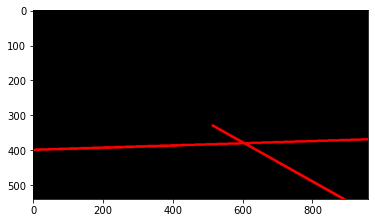

In [8]:
draw_lines(line_img, lines)
plt.imshow(line_img)
plt.show()

## Step 7: Concatenate the lines to the Original Image

Use image overlay logic to overlay the lines onto the image

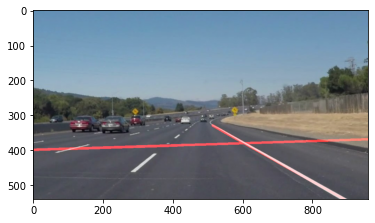

In [9]:
out_img = cv2.addWeighted(img, 0.9, line_img, 1.0, 0.0)
plt.imshow(out_img)
plt.show()

## Pipeline

With the model above, we can create a pipeline for the model. The idea is to connect to an endpoint, get the image from the camera stream, save it as an image, then run this code continuously to continuously get lines in an image!

In [10]:
# TODO: write a pipeline

# Conclusion:

Following a tutorial is mandatory in our understanding. Effort was put in to understand what goes into drawing the lines, but only on a high level. 

In the future, we will rewrite the draw line function and learn how to handle bad images like these.